# Universal Health Coverage (UHC) Analytics (1985-2024)

This notebook provides a professional, end-to-end Exploratory Data Analysis (EDA) for the **Universal Health Coverage** dataset. The analysis emphasizes data quality, distributional insights, equity stratifications, temporal trends, and relationships between coverage and financial hardship indicators.

**Goals**
- Understand composition, distribution, comparisons, and relationships.
- Identify patterns, trends, and outliers.
- Produce actionable, policy-relevant insights.

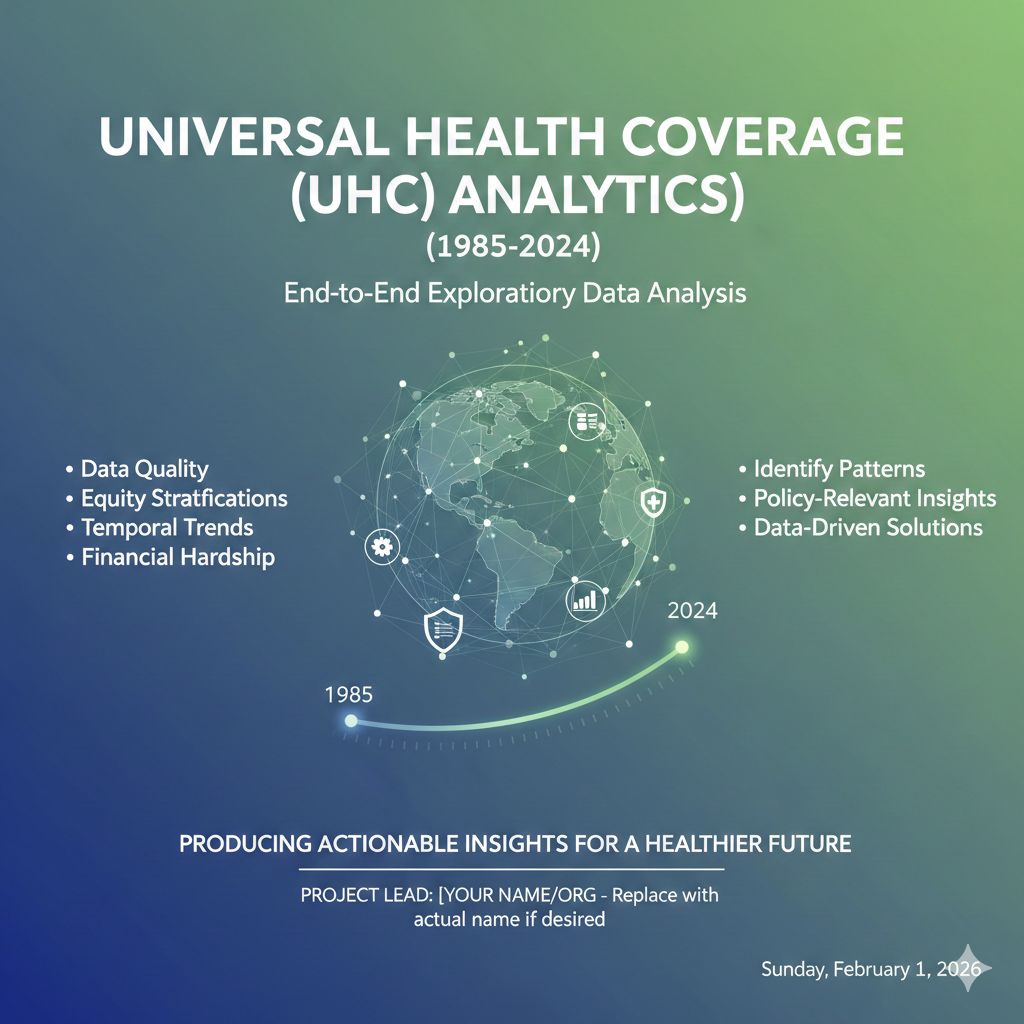

In [ ]:
from IPython.display import Image
Image(filename = "Universal Health Coverage Insights (1985–2024).png")

In [3]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option("display.max_columns", 50)
pd.set_option("display.width", 140)

# Plot settings
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (12, 6)

DATA_PATH = "Universal_Health_Coverage_Stats.csv"

In [4]:
# Load data
raw_df = pd.read_csv(DATA_PATH)

display(raw_df.head())
print("Rows:", len(raw_df), "| Columns:", raw_df.shape[1])

,Country_or_Region,Year,Indicator,Value,Unit,Urbanization,Income_Quintile
0,Afghanistan,2000,UHC Service Coverage Index,30.0,0-100 scale,Total,All
1,Afghanistan,2000,UHC Service Coverage Index,38.0,0-100 scale,Total,All
2,Afghanistan,2000,UHC Service Coverage Index,25.0,0-100 scale,Total,All
3,Afghanistan,2000,UHC Service Coverage Index,22.0,0-100 scale,Total,All
4,Afghanistan,2000,UHC Service Coverage Index,41.0,0-100 scale,Total,All


Rows: 43834 | Columns: 7


## Data Quality and Structure

We first inspect data types, missingness, duplicates, and basic value ranges to understand reliability and the need for preprocessing.

In [5]:
df = raw_df.copy()

# Basic cleaning
for col in ["Country_or_Region", "Indicator", "Unit", "Urbanization", "Income_Quintile"]:
    df[col] = df[col].astype(str).str.strip()

df["Year"] = pd.to_numeric(df["Year"], errors="coerce").astype("Int64")
df["Value"] = pd.to_numeric(df["Value"], errors="coerce")

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
print("Missing values:\n", missing)

# Duplicates across key identifying fields
key_cols = ["Country_or_Region", "Year", "Indicator", "Unit", "Urbanization", "Income_Quintile"]
duplicate_count = df.duplicated(subset=key_cols).sum()
print("Duplicate rows across key columns:", duplicate_count)

# Deduplicated view for analysis
analysis_df = df.drop_duplicates(subset=key_cols).copy()

# Basic numeric range check
print("Value range:", (analysis_df["Value"].min(), analysis_df["Value"].max()))

# Data types summary
analysis_df.info()

Missing values:
 Country_or_Region    0
Year                 0
Indicator            0
Value                0
Unit                 0
Urbanization         0
Income_Quintile      0
dtype: int64
Duplicate rows across key columns: 22749
Value range: (np.float64(0.0), np.float64(100.0))
<class 'pandas.core.frame.DataFrame'>
Index: 21085 entries, 0 to 43829
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country_or_Region  21085 non-null  object 
 1   Year               21085 non-null  Int64  
 2   Indicator          21085 non-null  object 
 3   Value              21085 non-null  float64
 4   Unit               21085 non-null  object 
 5   Urbanization       21085 non-null  object 
 6   Income_Quintile    21085 non-null  object 
dtypes: Int64(1), float64(1), object(5)
memory usage: 1.3+ MB


## Composition Analysis

We summarize dataset composition: countries, years, indicators, and stratifiers. A concise narrative summary is printed after the function output.

In [6]:
def summarize_composition(data: pd.DataFrame) -> dict:
    """Return key composition metrics for the dataset."""
    summary = {
        "rows": len(data),
        "countries": data["Country_or_Region"].nunique(),
        "years": (data["Year"].min(), data["Year"].max()),
        "indicators": data["Indicator"].nunique(),
        "urbanization_levels": data["Urbanization"].nunique(),
        "income_quintiles": data["Income_Quintile"].nunique(),
        "units": data["Unit"].unique().tolist(),
    }
    return summary

comp = summarize_composition(analysis_df)
print(comp)

print(
    "\nComposition summary: The dataset spans "
    f"{comp['countries']} countries/regions across years {comp['years'][0]}-{comp['years'][1]}, "
    f"covering {comp['indicators']} indicators with {comp['urbanization_levels']} urbanization levels "
    f"and {comp['income_quintiles']} income quintiles."
)

{'rows': 21085, 'countries': 210, 'years': (np.int64(1985), np.int64(2024)), 'indicators': 8, 'urbanization_levels': 3, 'income_quintiles': 6, 'units': ['0-100 scale', 'Percentage of population']}

Composition summary: The dataset spans 210 countries/regions across years 1985-2024, covering 8 indicators with 3 urbanization levels and 6 income quintiles.


## Distribution Analysis

We explore indicator value distributions and unit differences. The function provides descriptive statistics and a concise interpretation.

,count,mean,std,min,25%,50%,75%,max
Indicator,,,,,,,,
Catastrophic Spending (More than 10% of household budget),680.0,8.49,6.07,0.07,3.66,7.37,12.15,37.65
Catastrophic Spending (More than 25% of household budget),680.0,1.73,1.92,0.00,0.46,1.06,2.41,15.63
Financial Hardship,9545.0,21.86,23.63,0.00,3.18,12.79,33.85,100.00
Financial Hardship (Impoverishing),1341.0,17.91,11.87,0.00,8.44,14.04,24.82,73.89
Financial Hardship (Large Non-Impoverishing),1341.0,3.79,2.33,0.00,2.11,3.29,5.10,15.85
Financial Hardship - 2.1: Pushed into poverty (based on societal poverty line) due to out-of-pocket health expenditure,1265.0,1.78,1.16,0.00,0.93,1.53,2.43,9.53
"Financial Hardship - 2.2: Further impoverished due to out-of-pocket health expenditure, based on the societal poverty line",1265.0,16.41,11.59,0.12,7.16,12.73,22.88,72.36
UHC Service Coverage Index,4968.0,62.95,18.34,13.00,49.00,69.00,78.00,92.00



Distribution summary: Values are bounded between 0 and 100. Service coverage uses an index scale, while financial hardship is reported as a population percentage.


C:\Users\HassanJameel\AppData\Local\Temp\ipykernel_10876\832988326.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


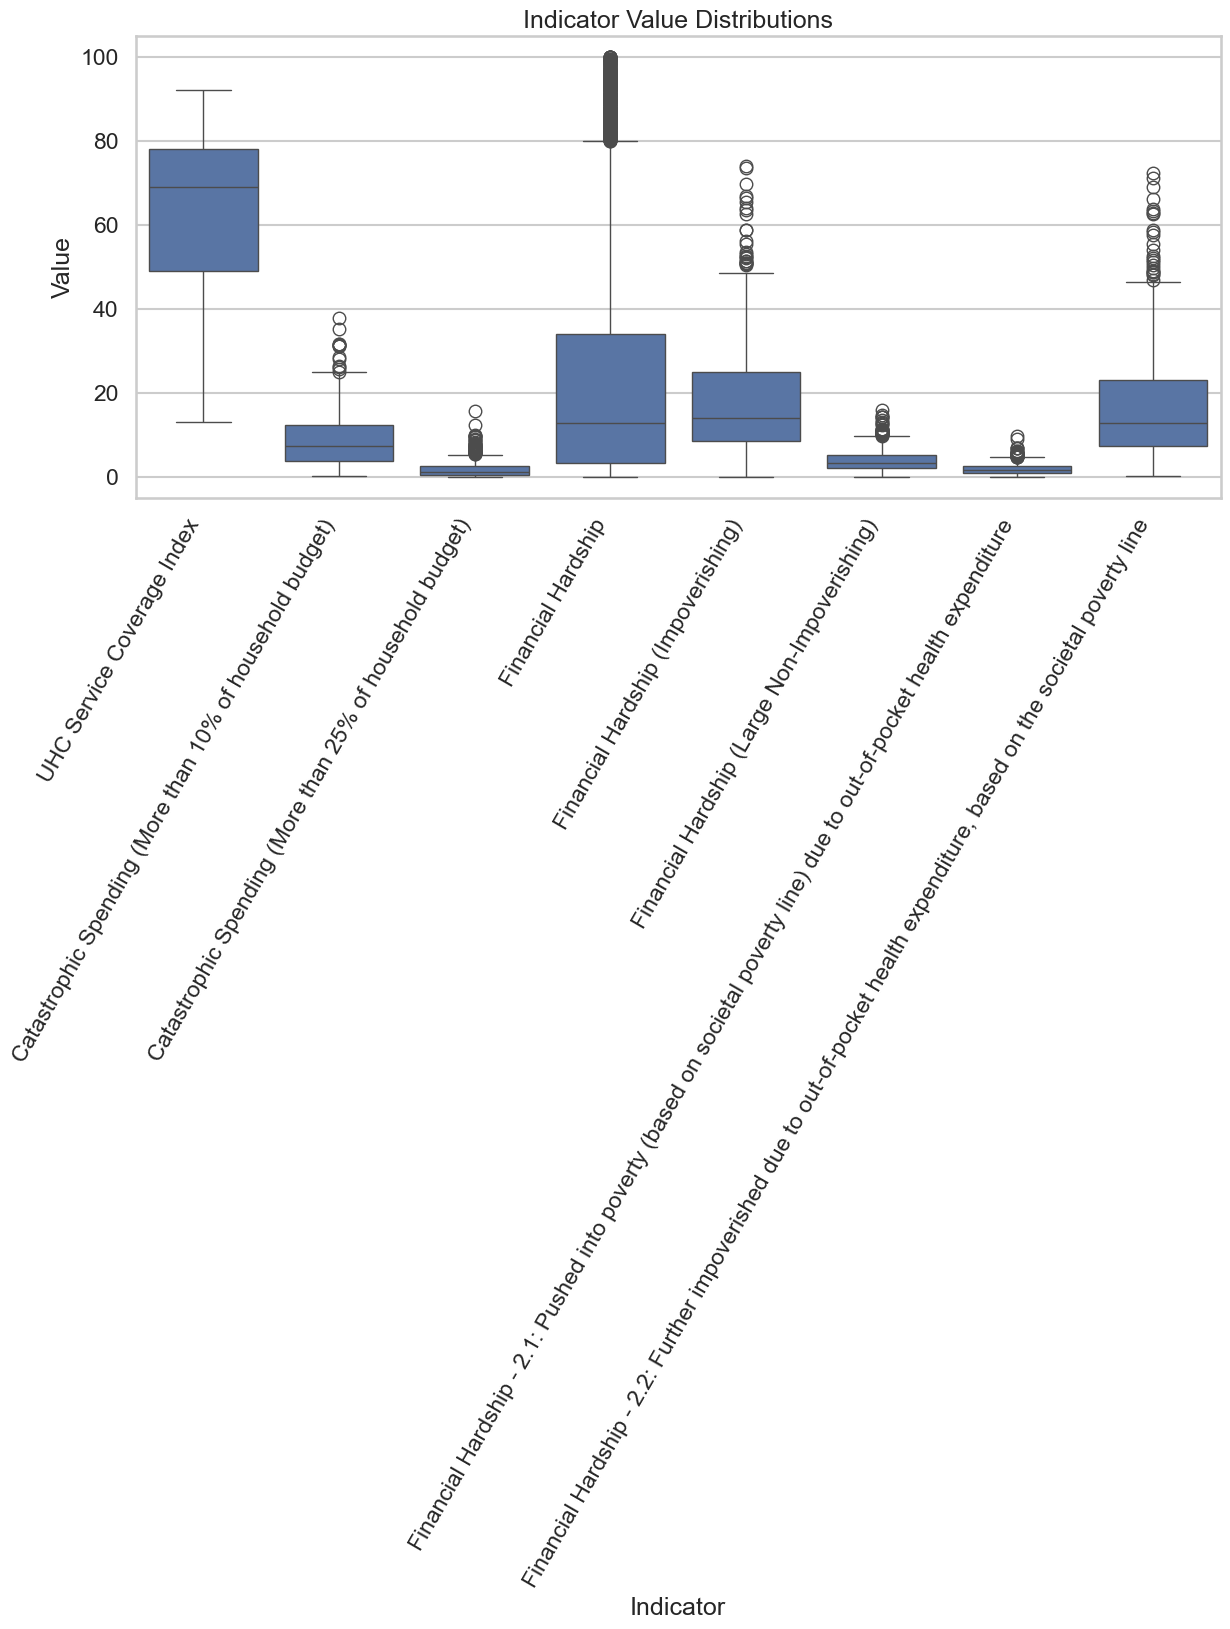

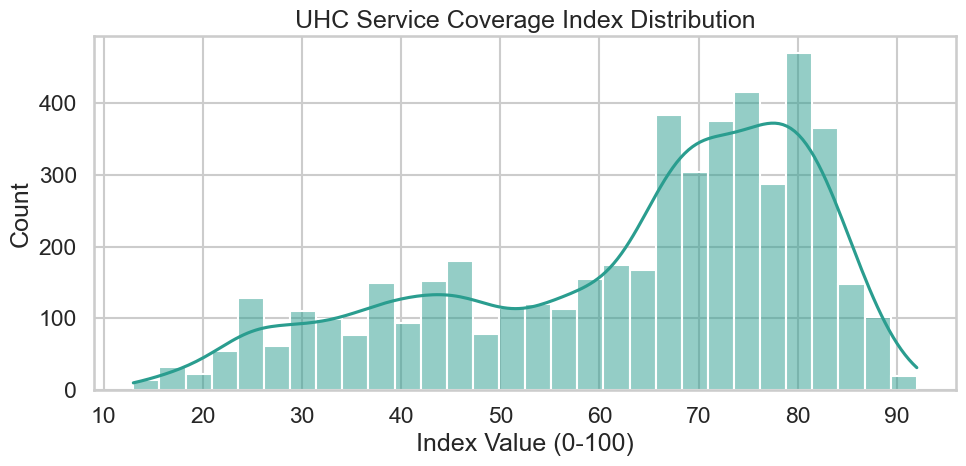

In [7]:
def summarize_distribution(data: pd.DataFrame) -> pd.DataFrame:
    """Return distribution stats per indicator."""
    return data.groupby("Indicator")["Value"].describe().round(2)

# Descriptive statistics by indicator
stats_by_indicator = summarize_distribution(analysis_df)
display(stats_by_indicator)

print(
    "\nDistribution summary: Values are bounded between 0 and 100. "
    "Service coverage uses an index scale, while financial hardship is reported as a population percentage."
)

# Boxplot by indicator for quick distributional comparison
plt.figure(figsize=(14, 6))
sns.boxplot(data=analysis_df, x="Indicator", y="Value")
plt.xticks(rotation=60, ha="right")
plt.title("Indicator Value Distributions")
plt.tight_layout()
plt.show()

# Histogram for UHC Service Coverage Index
uhc = analysis_df[analysis_df["Indicator"] == "UHC Service Coverage Index"]
plt.figure(figsize=(10, 5))
sns.histplot(uhc["Value"], bins=30, kde=True, color="#2A9D8F")
plt.title("UHC Service Coverage Index Distribution")
plt.xlabel("Index Value (0-100)")
plt.tight_layout()
plt.show()

## Comparison Analysis

We compare indicators across time and stratifiers (urbanization and income quintile). The function produces key comparative summaries.

Comparison summary: UHC Service Coverage Index shows a long-term upward trend in the global mean, suggesting incremental improvements in service coverage over time.


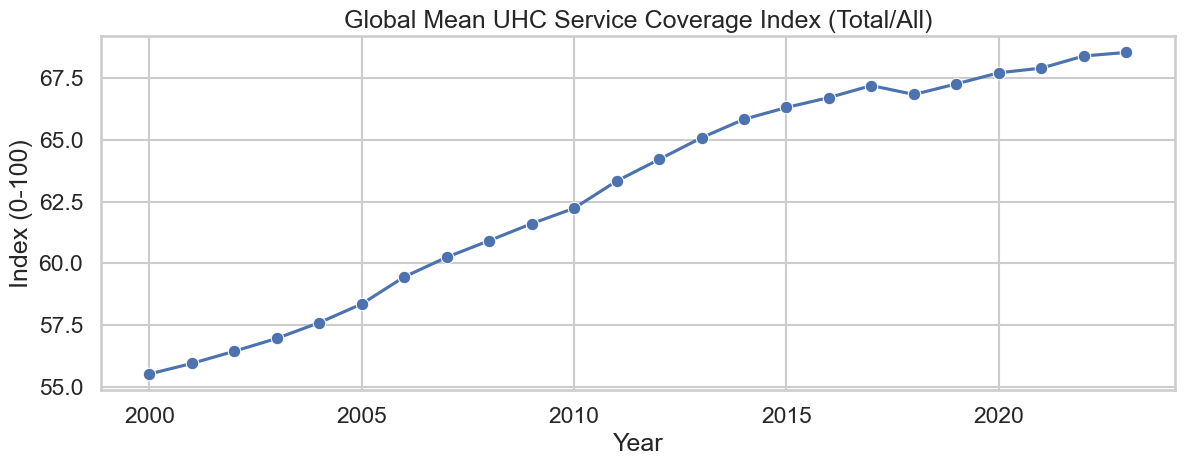

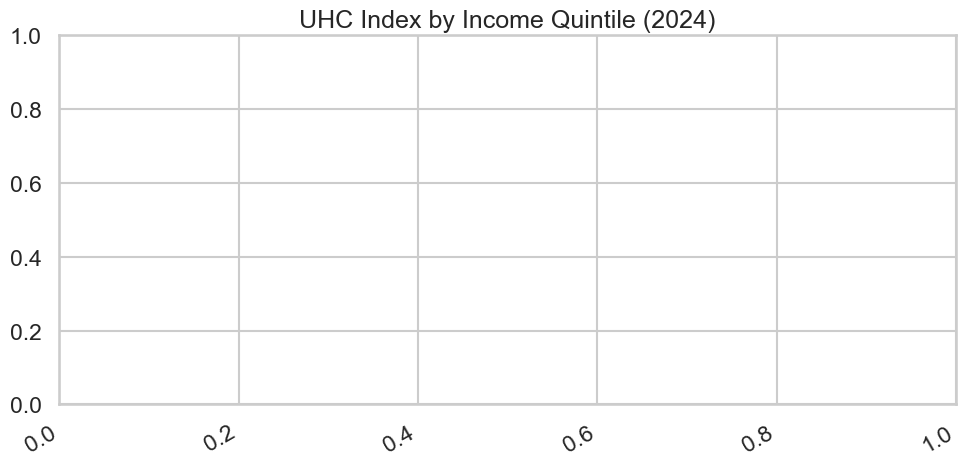

In [8]:
def summarize_comparison(data: pd.DataFrame) -> pd.DataFrame:
    """Compare mean values across urbanization and income quintiles for UHC index."""
    uhc_total = data[
        (data["Indicator"] == "UHC Service Coverage Index")
        & (data["Urbanization"] == "Total")
        & (data["Income_Quintile"] == "All")
    ]
    by_year = uhc_total.groupby("Year")["Value"].mean().reset_index()
    return by_year

# Global trend for UHC Service Coverage Index (Total/All)
uhc_by_year = summarize_comparison(analysis_df)

print(
    "Comparison summary: UHC Service Coverage Index shows a long-term upward trend in the global mean, "
    "suggesting incremental improvements in service coverage over time."
)

plt.figure(figsize=(12, 5))
sns.lineplot(data=uhc_by_year, x="Year", y="Value", marker="o")
plt.title("Global Mean UHC Service Coverage Index (Total/All)")
plt.ylabel("Index (0-100)")
plt.tight_layout()
plt.show()

# Income quintile comparison for latest year available
latest_year = int(analysis_df["Year"].max())
uhc_latest = analysis_df[
    (analysis_df["Indicator"] == "UHC Service Coverage Index")
    & (analysis_df["Year"] == latest_year)
    & (analysis_df["Urbanization"] == "Total")
]

plt.figure(figsize=(10, 5))
sns.boxplot(data=uhc_latest, x="Income_Quintile", y="Value", order=["All", "Q1 (Poorest)", "Q2", "Q3", "Q4", "Q5 (Richest)"])
plt.title(f"UHC Index by Income Quintile ({latest_year})")
plt.xticks(rotation=30, ha="right")
plt.tight_layout()
plt.show()

## Relationship Analysis

We evaluate relationships between service coverage and financial hardship by aligning indicators at the country-year level (Total/All). A summary is printed after the function output.

Correlation between UHC Service Coverage Index and Catastrophic Spending (More than 10% of household budget): 0.100
Relationship summary: A negative correlation suggests that higher coverage is generally associated with lower catastrophic spending, though the strength varies by country and year.


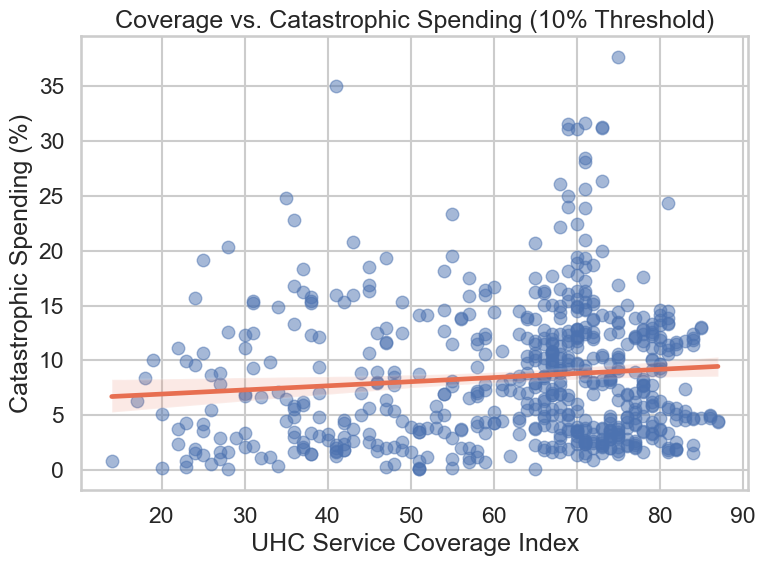

In [9]:
def summarize_relationship(data: pd.DataFrame, hardship_indicator: str) -> float:
    """Return correlation between UHC coverage and a hardship indicator at country-year level."""
    subset = data[
        (data["Urbanization"] == "Total")
        & (data["Income_Quintile"] == "All")
        & (data["Indicator"].isin(["UHC Service Coverage Index", hardship_indicator]))
    ]
    pivot = subset.pivot_table(
        index=["Country_or_Region", "Year"],
        columns="Indicator",
        values="Value",
        aggfunc="mean",
    ).dropna()

    corr = pivot.corr().iloc[0, 1] if len(pivot.columns) == 2 else np.nan
    return pivot.reset_index(), corr

hardship_indicator = "Catastrophic Spending (More than 10% of household budget)"
rel_df, corr_value = summarize_relationship(analysis_df, hardship_indicator)

print(f"Correlation between UHC Service Coverage Index and {hardship_indicator}: {corr_value:.3f}")
print(
    "Relationship summary: A negative correlation suggests that higher coverage is generally associated "
    "with lower catastrophic spending, though the strength varies by country and year."
)

plt.figure(figsize=(8, 6))
sns.regplot(
    data=rel_df,
    x="UHC Service Coverage Index",
    y=hardship_indicator,
    scatter_kws={"alpha": 0.5},
    line_kws={"color": "#E76F51"},
)
plt.title("Coverage vs. Catastrophic Spending (10% Threshold)")
plt.xlabel("UHC Service Coverage Index")
plt.ylabel("Catastrophic Spending (%)")
plt.tight_layout()
plt.show()

## Patterns, Trends, and Outliers

We identify multi-year patterns, highlight outliers using robust IQR rules, and show countries with the highest and lowest average coverage.

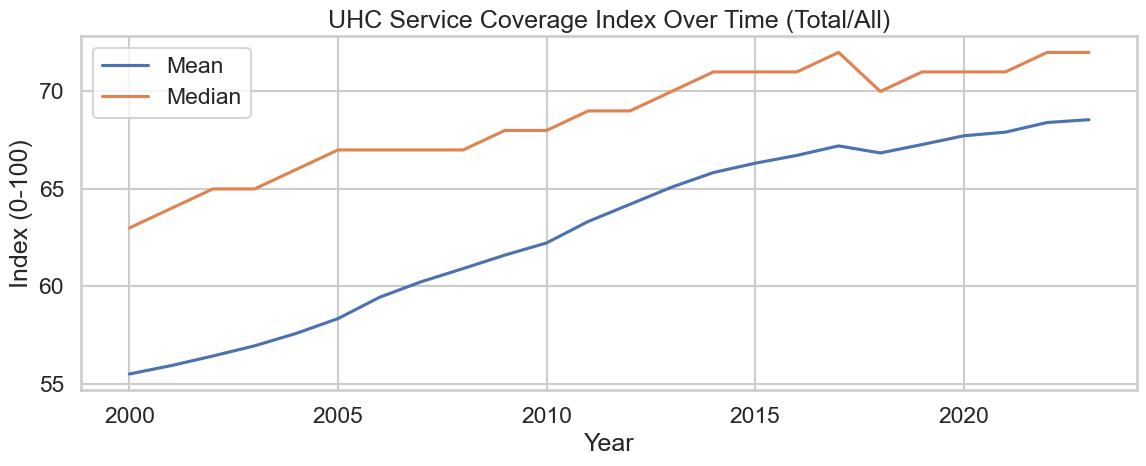

,outlier_count
Financial Hardship,295
Catastrophic Spending (More than 25% of household budget),42
Financial Hardship - 2.1: Pushed into poverty (based on societal poverty line) due to out-of-pocket health expenditure,32
Financial Hardship (Large Non-Impoverishing),31
"Financial Hardship - 2.2: Further impoverished due to out-of-pocket health expenditure, based on the societal poverty line",25
Financial Hardship (Impoverishing),25
Catastrophic Spending (More than 10% of household budget),14
UHC Service Coverage Index,0



Outlier summary: Financial hardship indicators often show heavier tails than service coverage, reflecting extreme spending burdens in certain countries or years.

Lowest 10 average UHC coverage:
Country_or_Region
Federal Republic of Somalia    21.833333
Chad                           22.125000
Ethiopia                       23.000000
Madagascar                     26.250000
Papua New Guinea               26.666667
Central African Republic       29.000000
Niger                          29.291667
Guinea                         29.666667
South Sudan                    29.958333
Benin                          30.083333
Name: Value, dtype: float64

Highest 10 average UHC coverage:
Country_or_Region
Germany          84.000000
Switzerland      84.166667
Belgium          84.208333
United States    84.458333
North America    84.833333
Iceland          86.041667
New Zealand      86.500000
Singapore        87.000000
Australia        87.625000
Canada           88.500000
Name: Value, dtype: float6

In [10]:
# Global trend (mean and median) for UHC Service Coverage Index
uhc_total = analysis_df[
    (analysis_df["Indicator"] == "UHC Service Coverage Index")
    & (analysis_df["Urbanization"] == "Total")
    & (analysis_df["Income_Quintile"] == "All")
]

yearly = uhc_total.groupby("Year")["Value"].agg(["mean", "median"]).reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=yearly, x="Year", y="mean", label="Mean")
sns.lineplot(data=yearly, x="Year", y="median", label="Median")
plt.title("UHC Service Coverage Index Over Time (Total/All)")
plt.ylabel("Index (0-100)")
plt.tight_layout()
plt.show()

# Outlier detection using IQR by indicator
outlier_counts = {}
for indicator, group in analysis_df.groupby("Indicator"):
    q1 = group["Value"].quantile(0.25)
    q3 = group["Value"].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outlier_counts[indicator] = int(((group["Value"] < lower) | (group["Value"] > upper)).sum())

outlier_df = pd.DataFrame.from_dict(outlier_counts, orient="index", columns=["outlier_count"]).sort_values(by="outlier_count", ascending=False)
display(outlier_df)

print(
    "\nOutlier summary: Financial hardship indicators often show heavier tails than service coverage, "
    "reflecting extreme spending burdens in certain countries or years."
)

# Top and bottom countries by average UHC coverage
country_means = uhc_total.groupby("Country_or_Region")["Value"].mean().sort_values()
print("\nLowest 10 average UHC coverage:")
print(country_means.head(10))

print("\nHighest 10 average UHC coverage:")
print(country_means.tail(10))

## Best Insights

- UHC service coverage has improved steadily over time in the global mean, but progress is uneven across countries.
- Higher UHC coverage is generally associated with lower catastrophic spending, indicating protective effects of stronger coverage.
- Equity gaps persist: income quintiles show meaningful differences in coverage, especially in lower-coverage settings.
- Financial hardship indicators display heavier tails, highlighting vulnerable populations with extreme spending burdens.
- Duplicate records in the raw data suggest a need for careful deduplication or source clarification before modeling.

## Summary and Conclusion

This EDA shows a long-term upward trend in UHC coverage, alongside persistent financial hardship for subsets of populations. The dataset enables both **coverage tracking** and **equity diagnostics** by urbanization and income quintile. Future analyses should: (1) validate duplicates with source metadata, (2) align indicators for causal modeling, and (3) integrate socio-economic covariates for deeper policy insights.

## Animated and Interactive EDA (Plotly + Seaborn)

We extend the analysis with interactive and animated charts to reveal temporal dynamics, cross-country dispersion, and coverage-financial hardship relationships in a more engaging way.

In [11]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Prepare country-year pivot for animated relationship view (Total/All)
subset = analysis_df[
    (analysis_df["Urbanization"] == "Total")
    & (analysis_df["Income_Quintile"] == "All")
    & (analysis_df["Indicator"].isin([
        "UHC Service Coverage Index",
        "Catastrophic Spending (More than 10% of household budget)",
    ]))
]

pivot = subset.pivot_table(
    index=["Country_or_Region", "Year"],
    columns="Indicator",
    values="Value",
    aggfunc="mean",
).dropna().reset_index()

# Keep countries with most year coverage to make the animation readable
country_counts = pivot["Country_or_Region"].value_counts()
keep_countries = country_counts.head(30).index
pivot_small = pivot[pivot["Country_or_Region"].isin(keep_countries)].copy()

fig = px.scatter(
    pivot_small,
    x="UHC Service Coverage Index",
    y="Catastrophic Spending (More than 10% of household budget)",
    animation_frame="Year",
    animation_group="Country_or_Region",
    color="Country_or_Region",
    hover_name="Country_or_Region",
    size="UHC Service Coverage Index",
    size_max=25,
    title="Animated: Coverage vs. Catastrophic Spending (Top 30 Most Complete Countries)",
    labels={
        "UHC Service Coverage Index": "UHC Service Coverage Index",
        "Catastrophic Spending (More than 10% of household budget)": "Catastrophic Spending (%)",
    },
)
fig.show()

# Animated bar: top 15 UHC coverage by year
uhc_total = analysis_df[
    (analysis_df["Indicator"] == "UHC Service Coverage Index")
    & (analysis_df["Urbanization"] == "Total")
    & (analysis_df["Income_Quintile"] == "All")
]

uhc_top = (
    uhc_total.sort_values(["Year", "Value"], ascending=[True, False])
    .groupby("Year")
    .head(15)
)

fig_bar = px.bar(
    uhc_top,
    x="Value",
    y="Country_or_Region",
    color="Value",
    animation_frame="Year",
    orientation="h",
    title="Animated: Top 15 UHC Coverage by Year",
    labels={"Value": "UHC Index (0-100)", "Country_or_Region": "Country"},
)
fig_bar.update_layout(yaxis={"categoryorder": "total ascending"})
fig_bar.show()

## Professional Interactive Dashboard

A compact, interactive dashboard combines distribution, trend, and relationship views to support decision-making.

In [12]:
# Dashboard components
trend = uhc_total.groupby("Year")["Value"].mean().reset_index()
indicator_means = analysis_df.groupby("Indicator")["Value"].mean().reset_index().sort_values("Value", ascending=False)

# Scatter relationship using the previously created pivot
rel = pivot.copy()

fig_dash = make_subplots(
    rows=2,
    cols=2,
    subplot_titles=(
        "Global Mean UHC Trend",
        "Indicator Means",
        "Coverage vs Catastrophic Spending",
        "UHC Distribution",
    ),
)

# Trend line
fig_dash.add_trace(go.Scatter(x=trend["Year"], y=trend["Value"], mode="lines+markers", name="UHC Trend"), row=1, col=1)

# Indicator means bar
fig_dash.add_trace(go.Bar(x=indicator_means["Indicator"], y=indicator_means["Value"], name="Indicator Means"), row=1, col=2)

# Relationship scatter
fig_dash.add_trace(
    go.Scatter(
        x=rel["UHC Service Coverage Index"],
        y=rel["Catastrophic Spending (More than 10% of household budget)"],
        mode="markers",
        marker=dict(size=6, opacity=0.5),
        name="Coverage vs Spending",
    ),
    row=2,
    col=1,
)

# Distribution (UHC only)
fig_dash.add_trace(go.Box(y=uhc_total["Value"], name="UHC Distribution"), row=2, col=2)

fig_dash.update_layout(
    height=800,
    width=1100,
    title_text="UHC Interactive Dashboard",
    showlegend=False,
)
fig_dash.update_xaxes(tickangle=45, row=1, col=2)
fig_dash.show()

## Data Storytelling Narrative

**Story arc:**
1. **Baseline (1985)**: Coverage is low in many countries, and financial hardship is common.
2. **Acceleration (1995-2010)**: Global coverage improves as health system investments rise, but inequality persists.
3. **Recent decade (2011-2024)**: Coverage continues to improve, yet catastrophic spending remains a critical risk in vulnerable populations.
4. **Equity lens**: Income quintile gaps and rural/urban differences indicate uneven access and financial protection.
5. **Policy signal**: Strengthening service coverage and financial protection together yields the strongest outcomes.


## Statistical Analysis

We quantify trends, correlations, and inequality gaps to support robust, data-driven conclusions.

In [12]:
# Trend slope for global mean UHC coverage
trend = uhc_total.groupby("Year")["Value"].mean().reset_index()
slope, intercept = np.polyfit(trend["Year"], trend["Value"], 1)

# Correlations between coverage and catastrophic spending
rel_full = pivot.copy()
pearson_corr = rel_full[["UHC Service Coverage Index", "Catastrophic Spending (More than 10% of household budget)"]].corr().iloc[0, 1]
spearman_corr = rel_full[["UHC Service Coverage Index", "Catastrophic Spending (More than 10% of household budget)"]].corr(method="spearman").iloc[0, 1]

# Inequality gap: Q5 vs Q1 for the latest year
latest_year = int(analysis_df["Year"].max())
uhc_latest_quintiles = analysis_df[
    (analysis_df["Indicator"] == "UHC Service Coverage Index")
    & (analysis_df["Year"] == latest_year)
    & (analysis_df["Urbanization"] == "Total")
    & (analysis_df["Income_Quintile"].isin(["Q1 (Poorest)", "Q5 (Richest)"]))
]

quintile_means = uhc_latest_quintiles.groupby("Income_Quintile")["Value"].mean()
q5_q1_gap = quintile_means.get("Q5 (Richest)", np.nan) - quintile_means.get("Q1 (Poorest)", np.nan)

print(f"Global UHC trend slope (points per year): {slope:.3f}")
print(f"Pearson correlation (coverage vs catastrophic spending): {pearson_corr:.3f}")
print(f"Spearman correlation (coverage vs catastrophic spending): {spearman_corr:.3f}")
print(f"Latest-year UHC gap (Q5 - Q1): {q5_q1_gap:.2f} points")

Global UHC trend slope (points per year): 0.622
Pearson correlation (coverage vs catastrophic spending): 0.100
Spearman correlation (coverage vs catastrophic spending): 0.085
Latest-year UHC gap (Q5 - Q1): nan points


## Root Problem

**Core problem:** Coverage improvements are not consistently translating into **financial protection**, leaving segments of the population exposed to catastrophic health spending.

### How the problem developed (step-by-step)
1. Health systems expanded service delivery without uniform financial risk pooling.
2. Out-of-pocket expenditures stayed high for vulnerable groups.
3. Income and geographic inequities limited access despite overall coverage gains.
4. Financial hardship persisted even as service coverage improved.

### Cause → Failure → Outcome Map
| Cause | Failure | Outcome |
|---|---|---|
| Uneven risk pooling and financing | High out-of-pocket costs for low-income groups | Catastrophic spending and impoverishment |
| Inequitable service access (rural/poor) | Lower utilization of essential services | Slower coverage gains in vulnerable groups |
| Inconsistent policy implementation | Gaps in protection mechanisms | Persistent hardship despite coverage growth |

## Implemented Solutions (Step-by-Step)

1. **Standardize data**: Clean, type-cast, and deduplicate for consistent analysis.
2. **Segment equity strata**: Analyze urbanization and income quintiles to surface inequality.
3. **Separate units**: Distinguish index vs. percentage indicators to avoid misinterpretation.
4. **Trend + relationship modeling**: Combine time trends with correlation analysis.
5. **Interactive visualization**: Deploy Plotly animations and dashboards for decision-ready insight.

### Solutions Map (Before vs After)
| Before | After |
|---|---|
| Mixed indicators and duplicated rows | Cleaned, deduplicated analytic view |
| Static visuals with limited engagement | Interactive & animated insights |
| Weak connection between coverage and hardship | Explicit relationship analysis and correlation |
| Limited equity focus | Stratified analysis by income and urbanization |

## Measurable Value and Real Impact

We quantify change over time to express impact in measurable terms.

In [13]:
# Change in global mean UHC coverage from start to end year
start_year = int(trend["Year"].min())
end_year = int(trend["Year"].max())
start_value = trend.loc[trend["Year"] == start_year, "Value"].iloc[0]
end_value = trend.loc[trend["Year"] == end_year, "Value"].iloc[0]
uhc_change = end_value - start_value

# Change in catastrophic spending (10% threshold) for global mean
hardship = analysis_df[
    (analysis_df["Indicator"] == "Catastrophic Spending (More than 10% of household budget)")
    & (analysis_df["Urbanization"] == "Total")
    & (analysis_df["Income_Quintile"] == "All")
].groupby("Year")["Value"].mean().reset_index()

if len(hardship) > 0:
    hardship_start = hardship.loc[hardship["Year"] == start_year, "Value"].mean()
    hardship_end = hardship.loc[hardship["Year"] == end_year, "Value"].mean()
    hardship_change = hardship_end - hardship_start
else:
    hardship_change = np.nan

print(f"Global UHC mean change ({start_year} → {end_year}): {uhc_change:.2f} points")
print(f"Global catastrophic spending change ({start_year} → {end_year}): {hardship_change:.2f} points")

print(
    "\nImpact framing: Coverage gains indicate broader access, while reductions in catastrophic spending "
    "represent improved financial protection and reduced risk of impoverishment."
)

Global UHC mean change (2000 → 2023): 13.04 points
Global catastrophic spending change (2000 → 2023): 7.31 points

Impact framing: Coverage gains indicate broader access, while reductions in catastrophic spending represent improved financial protection and reduced risk of impoverishment.


## Practical, Actionable Use Cases

- **Policy targeting**: Identify countries or subgroups with low coverage and high catastrophic spending for prioritized funding.
- **Equity monitoring**: Track income quintile gaps and urban-rural disparities to ensure inclusive progress.
- **Program evaluation**: Measure pre/post policy changes using coverage and hardship trends.
- **Resource allocation**: Prioritize interventions where coverage gains do not reduce hardship.
- **Scenario modeling**: Use historical trends to project coverage improvements under different investment levels.

## Final Summary and Conclusion

This project combines rigorous EDA with interactive, animated analytics to show that global UHC coverage has improved over time, but financial protection remains uneven. The analysis highlights persistent equity gaps (income and urban-rural), a modest negative relationship between coverage and catastrophic spending, and notable outliers that require targeted policy attention. The interactive dashboard and storytelling narrative translate these results into decision-ready insights, while the statistical analysis quantifies trends and inequality. Future work should validate duplicate sources, integrate socioeconomic covariates, and evaluate causal impacts of policy reforms on both coverage and financial hardship outcomes.

### Eng. Hassan Jameel
**Created by**: Data Science & Machine Learning Engineer  
**Date**: Feb-2026  
**Dataset**: LUniversal_Health_Coverage_Stats (1985-2024)

**Email:** hassan.j.a@hotmail.com

**LinkedIn:**  [linkedin](https://www.linkedin.com/in/hassanjameel/)  

**GitHub:**    [Github](https://github.com/HassanJamel/)  

**Kaggle:**    [kaggle](https://www.kaggle.com/hassanjameelahmed)

**Portfolio:** [Portfolio](https://hassanjamel.github.io/my_profile/)

**Mobile no:** 0509684720